클러스터링 모델의 목적은 데이터를 유사성 또는 밀도에 따라 그룹화하여 패턴을 발견하고, 데이터의 구조를 이해하는 데 있습니다.

## 1-1. k-means 를 활용한 클러스터링
- 최적의 n_clusters 찾기

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load your data
file_path = '/Users/comet39/SKN_bootcamp/EDA-5Team/data/processed_movie.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Select features for clustering
numeric_features = ['budget', 'popularity', 'vote_average', 'vote_count']
data['genres'] = data['genres'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(data['genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=data.index)

# Scale numeric features and combine with encoded genres
scaler = StandardScaler()
data_scaled_numeric = scaler.fit_transform(data[numeric_features])
data_final = pd.concat([pd.DataFrame(data_scaled_numeric, columns=numeric_features), genres_df], axis=1)

# Apply PCA for dimensionality reduction (reduce to 2 or 3 dimensions)
# 데이터는 여러 개의 수치형 변수와 다중 레이블로 인코딩된 장르를 포함하고 있어서 PCA를 통한 차원축소가 필요
pca = PCA(n_components=3)  # Adjust the number of components based on your data
data_pca = pca.fit_transform(data_final)
print(f"Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}")

# Perform clustering with optimal k
kmeans_optimal = KMeans(n_clusters=6, random_state=42)
kmeans_optimal.fit(data_pca)
data['cluster'] = kmeans_optimal.predict(data_pca)

filtered_data_pca = data_pca[data['cluster'] != -1]
filtered_labels = data['cluster'][data['cluster'] != -1]
silhouette_avg = silhouette_score(filtered_data_pca, filtered_labels)
print(f"Silhouette Score (excluding noise): {silhouette_avg}")

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 여러 클러스터 개수 테스트
sse = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(filtered_data_pca, kmeans.labels_))

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## 1-2. DBSCAN 를 활용한 클러스터링

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load your data
file_path = '/Users/comet39/SKN_bootcamp/EDA-5Team/data/processed_movie.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Select features for clustering
numeric_features = ['budget', 'popularity', 'vote_average', 'vote_count']
data['genres'] = data['genres'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(data['genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=data.index)

# Scale numeric features and combine with encoded genres
scaler = StandardScaler()
data_scaled_numeric = scaler.fit_transform(data[numeric_features])
data_final = pd.concat([pd.DataFrame(data_scaled_numeric, columns=numeric_features), genres_df], axis=1)

# Apply PCA for dimensionality reduction (reduce to 2 or 3 dimensions)
# 데이터는 여러 개의 수치형 변수와 다중 레이블로 인코딩된 장르를 포함하고 있어서 PCA를 통한 차원축소가 필요
pca = PCA(n_components=3)  # Adjust the number of components based on your data
data_pca = pca.fit_transform(data_final)
print(f"Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}")

# Evaluate DBSCAN as an alternative clustering algorithm
dbscan = DBSCAN(eps=0.4, min_samples=10)  # Adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(data_pca)
data['cluster'] = dbscan_labels

filtered_data_pca = data_pca[data['cluster'] != -1]
filtered_labels = data['cluster'][data['cluster'] != -1]
silhouette_avg = silhouette_score(filtered_data_pca, filtered_labels)
print(f"Silhouette Score (excluding noise): {silhouette_avg}")

Explained Variance Ratio by PCA: [0.31316745 0.16756273 0.14367633]
Silhouette Score (excluding noise): 0.444000884940312


In [26]:
import numpy as np
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

# # Step 1: k-Distance Graph로 eps 찾기
# min_samples = 10  # 초기 min_samples 값 설정
# neighbors = NearestNeighbors(n_neighbors=min_samples)
# neighbors_fit = neighbors.fit(data_pca)
# distances, indices = neighbors_fit.kneighbors(data_pca)

# # k-거리 정렬 및 시각화
# distances = np.sort(distances[:, min_samples - 1], axis=0)
# plt.figure(figsize=(8, 5))
# plt.plot(distances)
# plt.title('k-Distance Graph')
# plt.xlabel('Points sorted by distance')
# plt.ylabel(f'Distance to {min_samples}-th nearest neighbor')
# plt.show()

# Step 2: eps와 min_samples 조합 테스트 및 Silhouette Score 계산
eps_values = np.arange(0.2, 1.0, 0.1)  # eps 값 범위 설정
min_samples_values = [5, 10, 15,20]       # min_samples 값 범위 설정

results = []

for eps in eps_values:
    for min_samp in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samp)
        labels = dbscan.fit_predict(data_pca)

        # 클러스터가 최소 2개 이상인지 확인 (노이즈 제외)
        unique_labels = set(labels) - {-1}  # 노이즈 클러스터(-1) 제외
        if len(unique_labels) > 1:
            filtered_data_pca = data_pca[labels != -1]  # 노이즈 제거된 데이터
            filtered_labels = labels[labels != -1]     # 노이즈 제거된 레이블

            # 실루엣 스코어 계산
            silhouette_avg = silhouette_score(filtered_data_pca, filtered_labels)

            # Davies-Bouldin Index 계산 (낮을수록 좋음)
            dbi = davies_bouldin_score(filtered_data_pca, filtered_labels)

            # Calinski-Harabasz Index 계산 (높을수록 좋음)
            ch = calinski_harabasz_score(filtered_data_pca, filtered_labels)

            # 결과 저장
            results.append((eps, min_samp, silhouette_avg, dbi, ch))
        else:
            pass
            # print(f"Skipping eps={eps}, min_samples={min_samp} due to insufficient clusters.")

# 결과를 정렬
sorted_sil = sorted(results, key=lambda x: x[2], reverse=True)
sorted_DBI = sorted(results, key=lambda x: x[3], reverse=True)
sorted_CH = sorted(results, key=lambda x: x[4], reverse=True)

# 최적 파라미터 출력
print("🏆Top results based on Silhouette Score:")
for res in sorted_sil[:5]:  # 상위 5개 결과 출력
    print(f"eps={res[0]:.2f}, min_samples={res[1]}, Silhouette Score={res[2]:.4f}, DBI={res[3]:.4f}, CH={res[4]:.4f}")
print("\n🏆Top results based on DBI Score:")
for res in sorted_DBI[:5]:  # 상위 5개 결과 출력
    print(f"eps={res[0]:.2f}, min_samples={res[1]}, Silhouette Score={res[2]:.4f}, DBI={res[3]:.4f}, CH={res[4]:.4f}")
print("\n🏆Top results based on CH Score:")
for res in sorted_CH[:5]:  # 상위 5개 결과 출력
    print(f"eps={res[0]:.2f}, min_samples={res[1]}, Silhouette Score={res[2]:.4f}, DBI={res[3]:.4f}, CH={res[4]:.4f}")

# # Step 3: 결과 정렬 및 최적 파라미터 출력
# results.sort(key=lambda x: x[2], reverse=True)  # Silhouette Score 기준 정렬
# best_eps, best_min_samples, best_score = results[0]
# print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Silhouette Score: {best_score}")

🏆Top results based on Silhouette Score:
eps=0.90, min_samples=5, Silhouette Score=0.7040, DBI=0.2988, CH=130.4039
eps=0.80, min_samples=5, Silhouette Score=0.7011, DBI=0.2915, CH=112.1084
eps=0.70, min_samples=5, Silhouette Score=0.6687, DBI=0.3312, CH=98.2878
eps=0.40, min_samples=15, Silhouette Score=0.6531, DBI=0.2708, CH=202.4841
eps=0.80, min_samples=10, Silhouette Score=0.6290, DBI=0.3476, CH=92.4231

🏆Top results based on DBI Score:
eps=0.30, min_samples=10, Silhouette Score=0.2148, DBI=0.6200, CH=75.4811
eps=0.20, min_samples=5, Silhouette Score=-0.0228, DBI=0.6128, CH=106.2811
eps=0.20, min_samples=10, Silhouette Score=-0.0812, DBI=0.5885, CH=186.0394
eps=0.50, min_samples=5, Silhouette Score=0.4929, DBI=0.5723, CH=62.5218
eps=0.20, min_samples=15, Silhouette Score=0.1788, DBI=0.5153, CH=338.4213

🏆Top results based on CH Score:
eps=0.30, min_samples=20, Silhouette Score=0.5730, DBI=0.3380, CH=1253.7153
eps=0.20, min_samples=20, Silhouette Score=0.2724, DBI=0.4505, CH=640.1641

In [ ]:
# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results, columns=["eps", "min_samples", "silhouette_score"])

import matplotlib.pyplot as plt

# 선 그래프 생성
plt.figure(figsize=(12, 8))

# eps 별로 그룹화하여 선 그래프 생성
for eps in results_df["eps"].unique():
    subset = results_df[results_df["eps"] == eps]
    plt.plot(subset["min_samples"], subset["silhouette_score"], marker='o', label=f"eps={eps:.1f}")

# Legend 추가
plt.legend(title="eps values", fontsize="small")
plt.title("Silhouette Scores by eps and min_samples")
plt.xlabel("min_samples")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


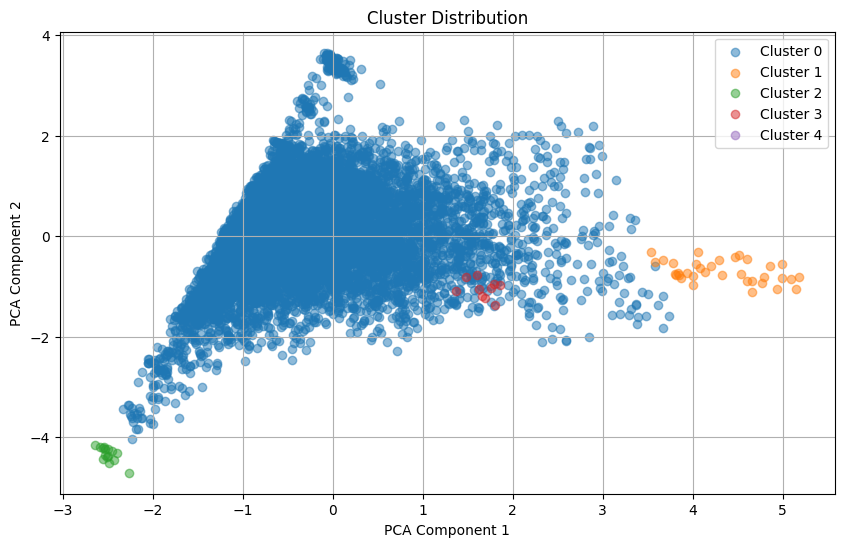

Cluster counts:
 cluster
-1      743
 0    10370
 1       35
 2       15
 3       10
Name: count, dtype: int64


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 시각화를 위한 차원 축소 (PCA 사용)
# 이미 전처리된 데이터 X_processed를 사용
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(data_final)

# 시각화
plt.figure(figsize=(10, 6))
for cluster in range(len(data.groupby('cluster'))):
    # 해당 클러스터의 데이터만 선택
    cluster_points = X_2d[data['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.5)

plt.title('Cluster Distribution')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

# 클러스터별 샘플 수 확인
cluster_counts = data['cluster'].value_counts().sort_index()
print("Cluster counts:\n", cluster_counts)

---

### 2-1. randomforest 회귀를 활용한 수익 예측

In [ ]:
# 필요한 라이브러리 import (누락 방지)
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 클러스터별 모델 저장 딕셔너리
cluster_models = {}

# 각 클러스터별로 반복 수행
for cluster_id in data['cluster'].unique():
    print(f"\n🚀 Training model for Cluster {cluster_id}...")
    
    # 클러스터별 데이터 분리
    cluster_data = data[data['cluster'] == cluster_id]
   
    # 입력 데이터(X)와 타겟 변수(y) 설정
    X = cluster_data[numeric_features]
    y = cluster_data['revenue']
    
    # 학습 데이터와 테스트 데이터 분할 (8:2 비율)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # 랜덤 포레스트 회귀 모델 생성 및 학습
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # 학습 및 테스트 데이터 예측 수행
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)
    
    # 테스트 데이터 기준 평가 지표 계산 (정정된 부분 ✅)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    print(f"📌 Cluster {cluster_id} - Mean Squared Error: {mse:.2f}")
    print(f"📌 Cluster {cluster_id} - R² Score: {r2:.4f}")
    
    # 클러스터별 모델 저장
    cluster_models[cluster_id] = rf_model
    
       
    # 시각화
    plt.figure(figsize=(8, 6))
    # 학습 데이터 산점도
    plt.scatter(x=y_train, y=y_train_pred, color='orange', alpha=0.2, label='Train Data')
    # 테스트 데이터 산점도
    plt.scatter(x=y_test, y=y_test_pred, color='blue', alpha=0.5, label='Test Data')

    # 회귀선 계산 및 그리기
    reg = np.polyfit(y_test, y_test_pred, 1)  # 1차 다항식(선형 회귀선) 계산
    p = np.poly1d(reg)  # 회귀선 함수 생성
    plt.plot(y_test, p(y_test), color='green', lw=2, label=f'Regression Line')

    # 예측선선 (y=x)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
    plt.title('Actual vs Predicted Revenue')
    plt.xlabel('Actual Revenue')
    plt.ylabel('Predicted Revenue')
    # plt.xlim([0, 1e9])
    # plt.ylim([0, 1e9])
    # plt.xscale('log')
    # plt.yscale('log')
    plt.legend()
    plt.grid()
    plt.show()


print("\n🎉 Training complete for all clusters!")

### 2-2. 선형 회귀를 활용한 수익 예측

In [ ]:
# 학습 및 평가
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# 각 클러스터별로 데이터 분리 및 모델 학습
cluster_models = {}
for cluster_id in data['cluster'].unique():
    print(f"\n🚀 Training model for Cluster {cluster_id}...")
    
    # 클러스터별 데이터 분리
    cluster_data = data[data['cluster'] == cluster_id]
   
    # 입력 데이터와 타겟 변수 설정
    X = cluster_data[numeric_features]
    y = cluster_data['revenue']
    
    # 학습 데이터와 테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    # print(f"train_score = {lr_model.score(X_train, y_train)}, train_score = {lr_model.score(X_test, y_test)}")

    y_train_pred = lr_model.predict(X_train)
    y_test_pred = lr_model.predict(X_test)

    # 테스트 데이터 기준 평가 지표 계산 (정정된 부분 ✅)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    print(f"📌 Cluster {cluster_id} - Mean Squared Error: {mse:.2f}")
    print(f"📌 Cluster {cluster_id} - R² Score: {r2:.4f}")
    
    # 클러스터별 모델 저장
    cluster_models[cluster_id] = rf_model
    
    # 시각화
    plt.figure(figsize=(8, 6))
    # 학습 데이터 산점도
    plt.scatter(x=y_train, y=y_train_pred, color='orange', alpha=0.2, label='Train Data')
    # 테스트 데이터 산점도
    plt.scatter(x=y_test, y=y_test_pred, color='blue', alpha=0.5, label='Test Data')

    # 회귀선 계산 및 그리기
    reg = np.polyfit(y_test, y_test_pred, 1)  # 1차 다항식(선형 회귀선) 계산
    p = np.poly1d(reg)  # 회귀선 함수 생성
    plt.plot(y_test, p(y_test), color='green', lw=2, label=f'Regression Line')

    # 예측선선 (y=x)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
    plt.title('Actual vs Predicted Revenue')
    plt.xlabel('Actual Revenue')
    plt.ylabel('Predicted Revenue')
    # plt.xlim([0, 1.5e9])
    # plt.ylim([0, 1.5e9])
    # plt.xscale('log')
    # plt.yscale('log')
    plt.legend()
    plt.grid()
    plt.show()


print("\n🎉 Training complete for all clusters!")

In [ ]:
# 시각화
plt.figure(figsize=(8, 6))
# 학습 데이터 산점도
plt.scatter(x=y_train, y=y_train_pred, color='orange', alpha=0.2, label='Train Data')
# 테스트 데이터 산점도
plt.scatter(x=y_test, y=y_test_pred, color='blue', alpha=0.5, label='Test Data')

# 회귀선 계산 및 그리기
reg = np.polyfit(y_test, y_test_pred, 1)  # 1차 다항식(선형 회귀선) 계산
p = np.poly1d(reg)  # 회귀선 함수 생성
plt.plot(y_test, p(y_test), color='green', lw=2, label=f'Regression Line')

# 예측선선 (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.xlim([0, 1.5e9])
plt.ylim([0, 1.5e9])
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()